# Case Study on Probability for Data Science

Problem Statement:
To make a suitable machine learning algorithm to predict if the mushroom is edible or poisonous (e or p) using the given dataset.

In [67]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading dataset into python
Data=pd.read_csv("mushrooms.csv")
Data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
Data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
Data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [63]:
Data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

C:\Users\Justin Thomas\anaconda3\new python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


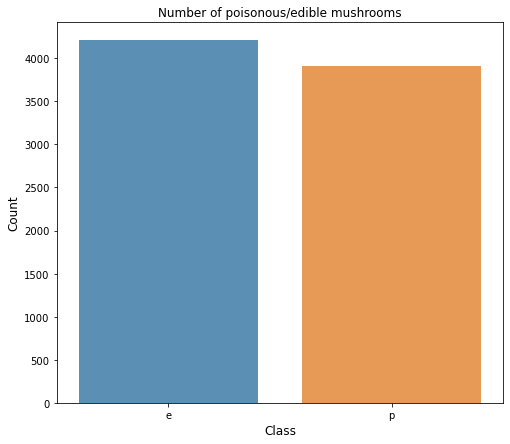

In [68]:
count = Data['class'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(count.index, count.values, alpha=0.8)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Number of poisonous/edible mushrooms')
plt.show()

In [69]:
# Using LabelEncoder to convert catergory values to ordinal
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in Data.columns:
    Data[column] = labelencoder.fit_transform(Data[column])
Data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


# 
**Splitting into feature set and class labels.**

In [71]:
#creating train and test data
x=Data.drop(['class'],axis=1).values
y=Data['class'].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

# 
**Splitting data into training set and test set.**

In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, random_state=0,test_size=0.25)

# 
**Feature Scaling**

In [82]:
#logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=10000)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

In [83]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1019   42]
 [  58  912]]


In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1061
           1       0.96      0.94      0.95       970

    accuracy                           0.95      2031
   macro avg       0.95      0.95      0.95      2031
weighted avg       0.95      0.95      0.95      2031



In [85]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print(classification_report(y_test, y_pred),sep='\n')
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred),sep='\n')
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1061
           1       1.00      1.00      1.00       970

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

[[1061    0]
 [   0  970]]
accuracy is 1.0


In [86]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print(classification_report(y_test, y_pred),sep='\n')
print(confusion_matrix(y_test, y_pred),sep='\n')
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1061
           1       1.00      1.00      1.00       970

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

[[1061    0]
 [   0  970]]
accuracy is 1.0


In [87]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred),sep='\n')
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1061
           1       1.00      1.00      1.00       970

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

[[1061    0]
 [   0  970]]
accuracy is 1.0


In [88]:
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1061
           1       1.00      1.00      1.00       970

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

[[1061    0]
 [   0  970]]
accuracy is 1.0


In [73]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train= sc.fit_transform(x_train)
x_test= sc.transform(x_test)
x_train

array([[-0.84654963,  0.9504593 ,  1.79845965, ..., -1.09502697,
         1.07975868, -0.29613015],
       [ 1.03000635,  0.9504593 , -0.18431722, ..., -0.25551778,
         1.07975868, -0.29613015],
       [-0.84654963,  0.13732415, -0.5808726 , ..., -0.67527237,
        -2.88490904, -0.29613015],
       ...,
       [ 1.03000635,  0.13732415, -0.5808726 , ..., -0.25551778,
        -0.50610841, -0.29613015],
       [-0.84654963, -1.48894614, -0.18431722, ..., -0.25551778,
         0.28682513, -0.87555243],
       [ 1.03000635,  0.9504593 , -0.5808726 , ..., -0.25551778,
         1.07975868, -0.87555243]])

# 
**Fitting Gaussian Naive Bayes to the Training set**

In [74]:
from sklearn.naive_bayes import  GaussianNB
Classifier=GaussianNB()
Classifier.fit(x_train,y_train)

GaussianNB()

# 
**Prediction of the test set result**

In [75]:
y_pred=Classifier.predict(x_test)
y_pred

array([1, 1, 0, ..., 1, 0, 0])

# 
**Making the Confusing Matrix**

In [76]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
ac=accuracy_score(y_test,y_pred)
cm

array([[966,  95],
       [ 79, 891]], dtype=int64)

In [77]:
ac

0.914327917282127

# 
**Fitting Bernoulli Naive Bayes to the training set**

In [78]:
from sklearn.naive_bayes import  BernoulliNB
Classifier=BernoulliNB()
Classifier.fit(x_train,y_train)

BernoulliNB()

In [79]:
y_pred=Classifier.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [80]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
ad=accuracy_score(y_test,y_pred)
cm


array([[1022,   39],
       [ 170,  800]], dtype=int64)

In [81]:
ad

0.897095027080256